# 读取文本训练模型

In [1]:
from gensim.models import Word2Vec
import pandas as pd
import gensim
import jieba
import numpy as np


In [2]:

# 读取训练文本数据，每行代表一个文本数据
train_data = pd.read_csv('corpus_0.csv', sep='\t')
train_data.fillna('', inplace=True)
train_data_0 = train_data.iloc[1:]

train_data_0

,corpus
1,# 高以翔 去世 ## 健康 中国 # 心脏 承担 两个 生命 心源性 猝死 说...
2,央视 新闻频道 正在 播出 宇芽 家暴 专题 采访 专题 之前 高 以翔 事件 报道...
3,中国 轴承 德国 轴承 差别 轴承 精度 国产 轴承 尺寸 偏差 旋转 精度 进口 ...
4,大部分 人 只 想活 光鲜 却 从来 没 想 过活 足够 久 世界 上 大部分 人 ...
5,内江 显示 地图
...,...
47129,# 年 最后 一天 # 早上 微信 群里 传者 图 车上 一位 大妈 朋友 通电话 ...
47130,结婚 怀孕 两家 公司 待过 最 想念 食物 叉烧 煲仔饭 书 看少 钱 没...
47131,最后 一次 乳印乳 俄 乳 髪 乳 英 具有 大 口径 四面 相控阵 雷达 垂直 发射 ...
47132,胰腺癌 公认 癌中 之王 目前 普遍 公认 胰腺癌 癌中 之王 原因 主要 ...


In [3]:
# 定义分词函数
def cut_words(sentence):
    return [word for word in jieba.cut(sentence) if word.strip()]


In [11]:
# 预处理语料库
sentences = [cut_words(str(text)) for text in train_data_0['corpus']]


In [ ]:
s = np.array(sentence)
np.save('demo.npy',s)

In [ ]:
s_new = np.load('demo.npy')
sentences = s_new.tolist()

In [6]:
# Training the Word2Vec model
model = gensim.models.Word2Vec(sentences,vector_size=200,alpha=0.025, window=5, min_count=10,
                 min_alpha=0.0025,sg=1, hs=0, negative=5, epochs=50)

In [7]:
# 保存模型
model_0.save('word2vec_0.model')

# 对齐词向量

In [1]:
import numpy as np
from scipy.linalg import orthogonal_procrustes
import gensim

# Load the Word2Vec model
model1 = gensim.models.Word2Vec.load('word2vec_0.model')
model2 = gensim.models.Word2Vec.load('word2vec_5.model')
model3 = gensim.models.Word2Vec.load('word2vec_11.model')

In [2]:
# Define the common vocabulary

common_vocab = list(set(model1.wv.key_to_index.keys()) & set(model2.wv.key_to_index.keys()) &set(model3.wv.key_to_index.keys()))
common_vocab_size = len(common_vocab)

In [3]:
# Get the word vectors for the common vocabulary in both models
W1 = np.zeros((common_vocab_size, 200))
W2 = np.zeros((common_vocab_size, 200))
W3 = np.zeros((common_vocab_size, 200))

for i, word in enumerate(common_vocab):
    W1[i] = model1.wv[word]
    W2[i] = model2.wv[word]
    W3[i] = model3.wv[word]

In [151]:
#肺炎  不明  新冠  抗击
#居家  假条  隔离  办公

In [152]:
common_vocab.index('居家')

21618

In [153]:
common_vocab.index('假条')

24297

In [154]:
common_vocab.index('隔离')

20846

In [155]:
common_vocab.index('办公')

12574

In [6]:
import numpy as np
from scipy.linalg import orthogonal_procrustes

#Calculate the centroids of the source matrix X and the target matrix Y
centroid_X = np.mean(W1, axis=0)
centroid_Y = np.mean(W2 , axis=0)
centroid_Z = np.mean(W3 , axis=0)

#Subtract the centroid from the source matrix X and the target matrix Y to obtain the matrix after removing the centroid
X_centered = W1 - centroid_X
Y_centered = W2 - centroid_Y
Z_centered = W3 - centroid_Z

#Calling orthogonal_ Orthogonal Procrustes transformation using procrustes function
Y_R, Y_scale = orthogonal_procrustes(X_centered, Y_centered)
Z_R, Z_scale = orthogonal_procrustes(X_centered, Z_centered)

#Obtain aligned matrix
aligned_Y = np.dot(X_centered, Y_R)
aligned_Z = np.dot(X_centered, Z_R)

#Add a translation vector to obtain alignment results that include translation operations
final_aligned_Y = aligned_Y * Y_scale + centroid_Y
final_aligned_Z = aligned_Z * Z_scale + centroid_Z





In [14]:
# Save the aligned model
np.save('vector01.npy', W1)
np.save('vector05.npy', final_aligned_Y)
np.save('vector11.npy', final_aligned_Z)

In [3]:
import numpy as np

In [7]:
W1 = np.load('./vector01.npy')
W2 = np.load('./vector05.npy')
W3 = np.load('./vector11.npy')

In [8]:
from sklearn.manifold import TSNE

In [9]:
# 使用t-SNE将对齐后的词向量降维到2维空间
tsne = TSNE(n_components=2, random_state=42)
word_vectors1_tsne = tsne.fit_transform(W1)
word_vectors2_tsne = tsne.fit_transform(W2)
word_vectors3_tsne = tsne.fit_transform(W3)

/root/miniconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/root/miniconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/root/miniconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/root/miniconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/root/miniconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/root/miniconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py

In [10]:
plt.scatter(word_vectors1_tsne[:, 0], word_vectors1_tsne[:, 1])
plt.scatter(word_vectors2_tsne[:, 0], word_vectors2_tsne[:, 1])
plt.scatter(word_vectors3_tsne[:, 0], word_vectors3_tsne[:, 1])
plt.show()

NameError: name 'plt' is not defined

In [1]:
# 可视化对齐后的词向量
plt.scatter(word_vectors1_tsne[12877, 0], word_vectors1_tsne[12877, 1], label='中国', color = 'black')
plt.scatter(word_vectors2_tsne[12877, 0], word_vectors2_tsne[12877, 1], label='中国', color = 'dimgrey')
plt.scatter(word_vectors3_tsne[12877, 0], word_vectors3_tsne[12877, 1], label='中国', color = 'silver')
plt.scatter(word_vectors1_tsne[6210, 0], word_vectors1_tsne[6210, 1], label='歧视', color = 'midnightblue')
plt.scatter(word_vectors2_tsne[6210, 0], word_vectors2_tsne[6210, 1], label='歧视', color = 'blue')
plt.scatter(word_vectors3_tsne[6210, 0], word_vectors3_tsne[6210, 1], label='歧视', color = 'cyan')
plt.scatter(word_vectors1_tsne[18567, 0], word_vectors1_tsne[18567, 1], label='黑人', color = 'darkred')
plt.scatter(word_vectors2_tsne[18567, 0], word_vectors2_tsne[18567, 1], label='黑人', color = 'red')
plt.scatter(word_vectors3_tsne[18567, 0], word_vectors3_tsne[18567, 1], label='黑人', color = 'lightcoral')
plt.legend()
plt.xlabel('t-SNE维度1')
plt.ylabel('t-SNE维度2')
plt.title('对齐后的词向量可视化')
plt.show()

NameError: name 'plt' is not defined

In [17]:
import matplotlib.pyplot as plt

KeyError: 'figure.hooks'

In [20]:
import matplotlib.pyplot as plt
# 支持中文
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

In [13]:
# Update the word vectors in the second model with the aligned vectors
for i, word in enumerate(common_vocab):
    model.wv[word] = final_aligned_X[i]

NameError: name 'final_aligned_X' is not defined

In [ ]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

word_vectors1_tsne = TSNE(n_components=3,random_state=42,perplexity=30).fit_transform(W1)
word_vectors2_tsne = TSNE(n_components=3,random_state=42,perplexity=30).fit_transform(aligned_Y)
word_vectors3_tsne = TSNE(n_components=3,random_state=42,perplexity=30).fit_transform(aligned_Z)


# 可视化三个对齐后的词向量空间

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gensim
import re

# Load the Word2Vec model
model0 = gensim.models.Word2Vec.load('word2vec_0.model')
model1 = gensim.models.Word2Vec.load('aligned_model5.model')
model2 = gensim.models.Word2Vec.load('aligned_model11.model')

In [2]:
#定义共同的词汇表
vocab0= list(model0.wv.key_to_index.keys())[:4000]
vocab1= list(model1.wv.key_to_index.keys())[:4000]
vocab2= list(model2.wv.key_to_index.keys())[:4000]

In [3]:
common_vocab_ = list((set(vocab0) & set(vocab1) & set(vocab2)))

In [4]:
common_vocab = [word for word in common_vocab_ if re.compile(r"[\u4e00-\u9fa5]+").fullmatch(word)] # 取前1000个词汇

In [23]:
#common_vocab

In [34]:
#定义要绘制的单词
words = ['中国','肺炎','黑人','女人','歧视']

#获取要绘制的单词的索引
word_indices_0 = [model0.wv.key_to_index[word] for word in words]
word_indices_1 = [model1.wv.key_to_index[word] for word in words]
word_indices_2 = [model2.wv.key_to_index[word] for word in words]

In [36]:
#import shutil
#import matplotlib

#shutil.rmtree(matplotlib.get_cachedir())

In [37]:
from sklearn.manifold import TSNE
#from sklearn.decomposition import PCA
tsne = TSNE(n_components=2, perplexity=2)
#tsne = PCA(n_components=2)

/root/miniconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/root/miniconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/root/miniconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/root/miniconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/root/miniconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/root/miniconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py

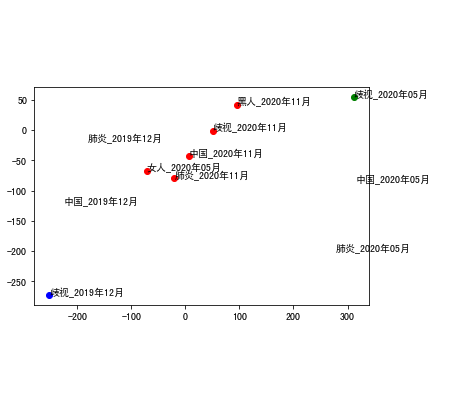

<Figure size 432x288 with 0 Axes>

In [73]:
#获取要绘制的单词的向量
vector_0 = model0.wv.vectors[word_indices_0]
vector_1 = model1.wv.vectors[word_indices_1]
vector_2 = model2.wv.vectors[word_indices_2]

vector_0 = tsne.fit_transform(vector_0)
vector_1 = tsne.fit_transform(vector_1)
vector_2 = tsne.fit_transform(vector_2)

#绘制散点图
plt.scatter(vector_0[4, 0], vector_0[4, 1], color = 'blue')
plt.scatter(vector_1[4, 0], vector_1[4, 1], color = 'green')
plt.scatter(vector_2[:, 0], vector_2[:, 1], color = 'red')


#为单词添加标签
for i, word in enumerate(words):
    plt.annotate("中国_2019年12月" if word == '中国' else "肺炎_2019年12月" if word == '肺炎' else "黑人_2019年12月" if word == '黑人'else "女人_2019年12月" if word == '女人' else "歧视_2019年12月" if word == '歧视' else "", xy=(vector_0[i, 0], vector_0[i, 1]))

#为单词添加标签
for i, word in enumerate(words):
    plt.annotate("中国_2020年05月" if word == '中国' else "肺炎_2020年05月" if word == '肺炎' else "黑人_2020年05月" if word == '黑人'else "女人_2020年05月" if word == '女人' else "歧视_2020年05月" if word == '歧视' else "", xy=(vector_1[i, 0], vector_1[i, 1]))
    
#为单词添加标签 
for i, word in enumerate(words):
    plt.annotate("中国_2020年11月" if word == '中国' else "肺炎_2020年11月" if word == '肺炎' else "黑人_2020年11月" if word == '黑人' else "女人_2020年05月" if word == '女人'else "歧视_2020年11月" if word == '歧视' else "", xy=(vector_2[i, 0], vector_2[i, 1]))
'''
#绘制相同词两点之间的线段
for i in range(len(words)):
    plt.arrow(vector_0[i, 0], vector_0[i, 1], vector_1[i, 0]-vector_0[i, 0], vector_1[i, 1]-vector_0[i, 1], head_length=0.01, fc='k', ec='k')
    plt.arrow(vector_1[i, 0], vector_1[i, 1], vector_2[i, 0]-vector_1[i, 0], vector_2[i, 1]-vector_1[i, 1], head_length=0.01, fc='k', ec='k')
'''
# 显示图形
plt.show()
plt.savefig('./figure.pdf', format='pdf')

In [148]:
model = gensim.models.Word2Vec.load('word2vec_11.model')

In [150]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy import sparse

# 计算每个单词与整个语料库中所有单词的平均词向量之间的余弦相似度
word = '隔离'
similarity_scores = {}
for vocab in common_vocab:
    similarity = cosine_similarity([model.wv[word]], [model.wv[vocab]])
    similarity_scores[vocab] = similarity[0][0]
    
# 对相似度进行排序，获取前10个相似单词
similar_words = sorted(similarity_scores.items(), key=lambda x: x[1], reverse=True)[:20]
print(f'The top 10 words that are most similar to "{word}" and their similarity are: {similar_words}')


The top 10 words that are most similar to "隔离" and their similarity are: [('隔离', 0.9999999), ('居家', 0.5079379), ('检验', 0.4769548), ('检疫', 0.4647197), ('看守所', 0.44843668), ('程序', 0.44081578), ('自我', 0.4391149), ('观察', 0.4224017), ('中午', 0.41909704), ('穿', 0.41675156), ('蒙古', 0.41282862), ('羊', 0.4091948), ('间', 0.39983118), ('入境', 0.39972597), ('集中', 0.3996463), ('开心', 0.39492625), ('医学观察', 0.39077923), ('一辆', 0.3787737), ('戴', 0.3734352), ('天后', 0.36340076)]


In [96]:
 报税 重疾险

SyntaxError: invalid syntax (372039165.py, line 1)

In [ ]:
# 使用稀疏矩阵计算两个词向量矩阵之间的相似度
matrix = model.wv.vectors
similarity_matrix = cosine_similarity(sparse.csr_matrix(matrix))f
print(f'词向量空间中第一个单词与第二个单词之间的余弦相似度为：{similarity_matrix[0, 1]}')